# Cloud Computing for Distributed Big Data Applications
Practical Session 2

## 1. Global Warming Trends

In [1]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import IFrame

In [2]:
# load data
DATA_FILE_PATH = './data/'
DATA_FILE_NAME_GLOBAL = 'GlobalTemperatures.csv'
DATA_FILE_NAME_CITY = 'GlobalLandTemperaturesByCity.csv'

df_global = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME_GLOBAL)
df_global['dt'] = pd.to_datetime(df_global['dt'], format='%Y-%m-%d')

df_per_city = pd.read_csv(DATA_FILE_PATH + DATA_FILE_NAME_CITY)
df_per_city['date'] = pd.to_datetime(df_per_city['date'], format='%Y-%m-%d')

### Can global warming be observed on earth's temperature evolution?

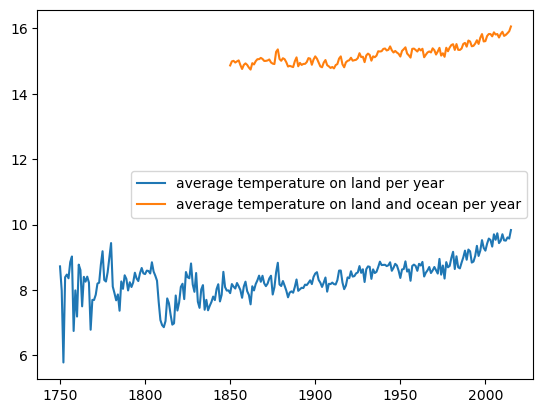

In [3]:
# average for each year
average_temp_per_year_df = pd.DataFrame({ "year": [], "land_temp_per_year": [], "land_and_ocean_temp_per_year": []})

years = list(range(1750, 2015+1))

for year in years:
    filtered_df = df_global.loc[(df_global['dt'] >= str(year) + '-01-01')
                     & (df_global['dt'] < str(year) +'-12-02')]
    mean_land = filtered_df.LandAverageTemperature.mean()
    mean_land_and_ocean = filtered_df.LandAndOceanAverageTemperature.mean(skipna=True)
    average_temp_per_year_df.loc[len(average_temp_per_year_df)] = [year, mean_land, mean_land_and_ocean]

average_temp_per_year_df.year = average_temp_per_year_df.year.astype(int)
plt.plot(average_temp_per_year_df.year, average_temp_per_year_df.land_temp_per_year, label = "average temperature on land per year")
plt.plot(average_temp_per_year_df.year, average_temp_per_year_df.land_and_ocean_temp_per_year, label = "average temperature on land and ocean per year")
plt.legend()
plt.show()

This plot shows the average land temperature per year worldwide. As you can see, it went from ~8 degrees up to more than 9.5 degrees, especially in the last few years. For the land and ocean temperature we cannot see the first few years, since there was no data available yet, but we can see that the temperatue already increased in the last 50 years.

### Can the average country temperature be plotted in a compact way? you may take a (logical) sample of countries. You may also get the year’s average temperature for each.

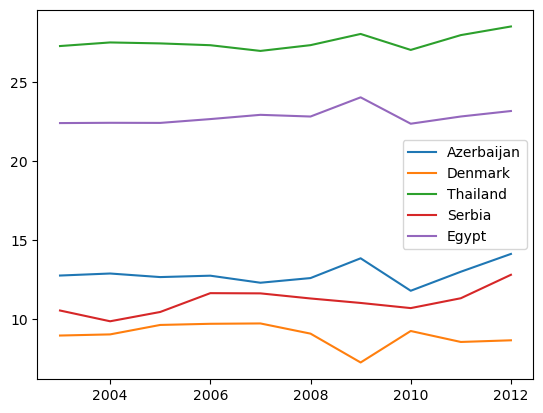

In [4]:
# get average temperature per country
countries = list(set(df_per_city.Country.to_list()))
years = range(2003, 2013)

for country in countries[:5]:
    # get average temperature
    df_country = df_per_city.loc[df_per_city["Country"] == country]
    mean_country_temp = df_country.AverageTemperature.mean()
    #print(country, mean_country_temp)
    df_country_year = df_country.groupby(df_country.date.dt.year)['AverageTemperature'].mean()
    #display(df_country_year.tail(10))
    plt.plot(years, df_country_year.tail(10).to_list(), label = country)

plt.legend()
plt.show()

### What does the comparison of the evolution of the temperature between two drastically different countries (location wise) allow you to observe?

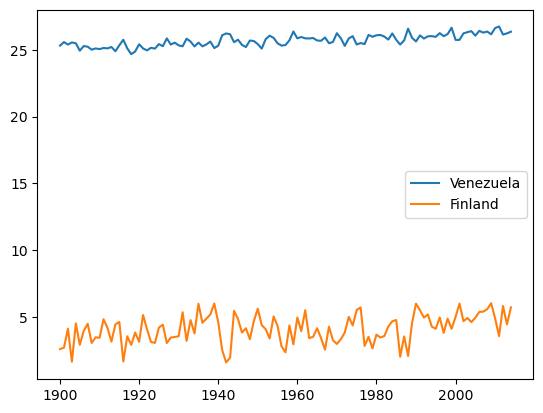

In [5]:
# compare with max lat vs min lat
# compare with max long vs min long
countries = ["Venezuela", "Finland"]
years = range(1900, 2015)

for country in countries[:5]:
    # get average temperature
    df_city = df_per_city.loc[df_per_city["Country"] == country]
    mean_city_temp = df_city.AverageTemperature.mean()
    df_city_year = df_city.groupby(df_city.date.dt.year)['AverageTemperature'].mean()
    plt.plot(years, df_city_year.tail(115).to_list(), label = country)

plt.legend()
plt.show()

On this plot, you can observe that the temperature variation for Finland is higher than for Venezuela.

### Can the average city temperature be plotted in a compact way? you may take a (logical) sample of cities. You may also get the year’s average temperature for each.

We chose cities for each of those climate zones: Tropical (Kuala Lumpur), Dry (Johannesburg), Temperate (Bilbao), Continental (Chicago).

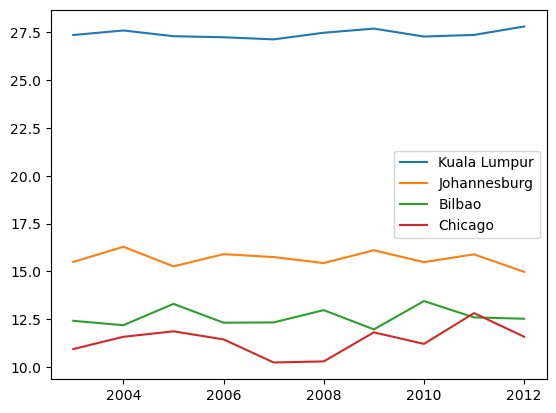

In [6]:
cities = ["Kuala Lumpur", "Johannesburg", "Bilbao", "Chicago"]
years = range(2003, 2013)

for city in cities[:5]:
    # get average temperature
    df_city = df_per_city.loc[df_per_city["City"] == city]
    mean_city_temp = df_city.AverageTemperature.mean()
    df_city_year = df_city.groupby(df_city.date.dt.year)['AverageTemperature'].mean()
    plt.plot(years, df_city_year.tail(10).to_list(), label = city)

plt.legend()
plt.show()

In this plot, you can see the average temperature over the last 10 years of cities in different climate zones. We could have also plotted the total average temperature of each city, but this would have given us not that much insight about the evolution of the temperature. We decided to instead only focus on the last few years.

### How does one specific country evolve between two distinct years?

2011:  10.090863636363636
2012:  9.143772727272726


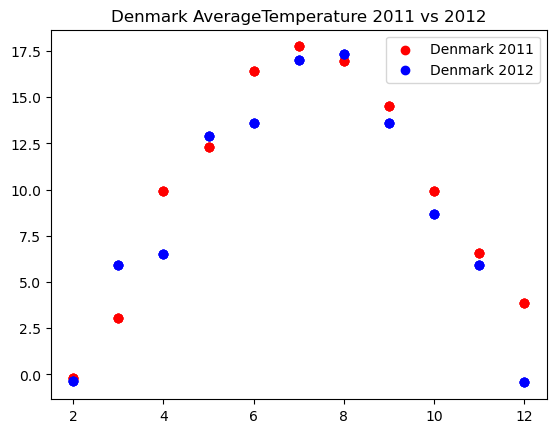

In [7]:
denmark_2011 = df_per_city[df_per_city.Country == "Denmark"][df_per_city["date"] > "2011-1-1"][df_per_city["date"] < "2012-1-1"]
denmark_2012 = df_per_city[df_per_city.Country == "Denmark"][df_per_city["date"] > "2012-1-1"][df_per_city["date"] < "2013-1-1"]

print("2011: ", denmark_2011["AverageTemperature"].mean())
print("2012: ", denmark_2012["AverageTemperature"].mean())

denmark_2011["mean_avgtemp"] = denmark_2011.groupby("date")["AverageTemperature"].transform('mean')
denmark_2012["mean_avgtemp"] = denmark_2012.groupby("date")["AverageTemperature"].transform('mean')
    
plt.scatter(x=denmark_2011.date.dt.month,y=denmark_2011['mean_avgtemp'],color='red', label="Denmark 2011")
plt.scatter(x=denmark_2012.date.dt.month,y=denmark_2012['mean_avgtemp'],color='blue', label="Denmark 2012")
    
plt.title('Denmark AverageTemperature 2011 vs 2012')
plt.legend()
plt.show()

You can see that in two years, that are really close, there is no big variation to see. 

### Can the Arctic Ice Melting be observed by looking at the temperature changes in northern cities?

In [8]:
def change_lat_to_float(lat):
    if "N" in lat:
        lat = lat.replace("N", "")
    else:
        lat = lat.replace("S","")
        lat = "-" + lat
    return lat

df_per_city.Latitude = df_per_city.Latitude.apply(change_lat_to_float)

df_per_city['Latitude'] = pd.to_numeric(df_per_city['Latitude'], downcast='float', errors='coerce')
display(df_per_city)

,date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.049999,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.049999,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.049999,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.049999,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.049999,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.240002,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.240002,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.240002,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.240002,5.26E


400932      Russia
5559802    Finland
6333968    Iceland
Name: Country, dtype: object


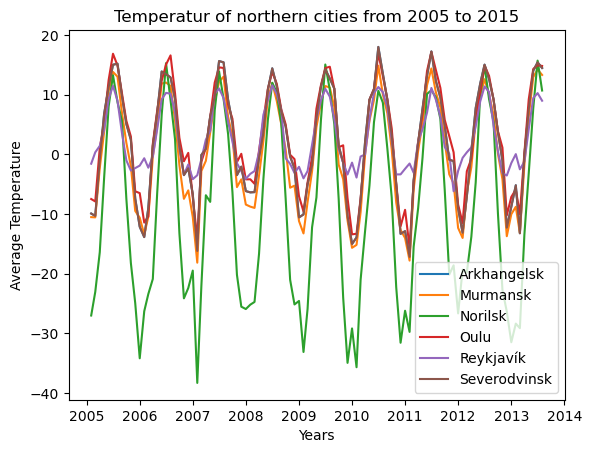

In [9]:
north_df = df_per_city[df_per_city.Latitude > 65][df_per_city["date"] > "2005-1-1"][df_per_city["date"] < "2015-1-1"]
print(north_df.Country.drop_duplicates())

fig, ax = plt.subplots()

for city in north_df.City.drop_duplicates():
    tmp_city = north_df[north_df.City==city]
    ax.plot(tmp_city.date, tmp_city.AverageTemperature, label=city)

ax.set_xlabel("Years")
ax.set_ylabel("Average Temperature")
ax.legend(loc='best')
plt.title('Temperatur of northern cities from 2005 to 2015')
plt.show()

As you can see in this plot, the nordic cities all have temperatures over 0 degrees, meaning that there the ice would melt during summer. Especially in Reykjavik, the temperature is always around 0 degrees or higher. But we can not speak for more northern parts of the world.

### Plot these cities in a map

In [10]:
# fix longitude for the north cities
df_per_city['Longitude'] = df_per_city['Longitude'].str.replace("E","")
# mess west longitude on purpose :)
df_per_city['Longitude'] = df_per_city['Longitude'].str.replace("W","*-1")
north_df = df_per_city[df_per_city.Latitude > 65][df_per_city["date"] > "2005-1-1"][df_per_city["date"] < "2015-1-1"]

In [11]:
fig = px.line_geo()
fig = px.scatter_geo(north_df, 
                     lat="Latitude", lon="Longitude",
                     color="City", # which column to use to set the color of markers
                     hover_name="City", # column added to hover information
                     size="Latitude", # size of markers
                     projection="natural earth")
fig.write_html('north_cities_map.html', auto_open=True)

In [12]:
IFrame(src='./north_cities_map.html', width=900, height=600)

The map can be seen on the north_cities_map.html file, or in a jupyter notebook on the browser.

### Quantify the autocorrelation of the average temperature of the country of your choice.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

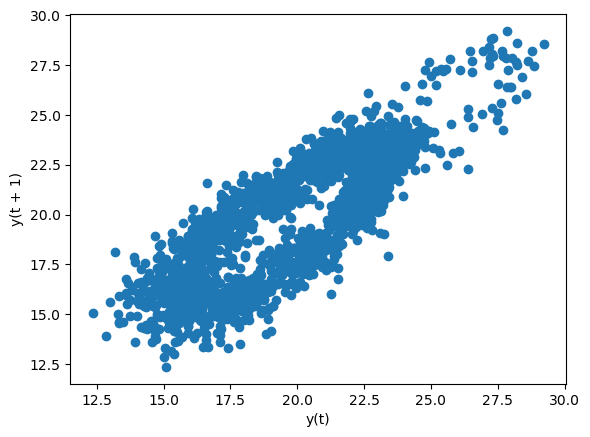

In [13]:
country_of_choice_df = df_per_city.loc[df_per_city['Country'] == "Mexico"]
country_aggregated_df = country_of_choice_df.groupby('date').agg({'AverageTemperature': ['mean']})
pd.plotting.lag_plot(country_aggregated_df.AverageTemperature, lag=1)

Is the temperature evolution of a northern city correlated with the evolution of a southern one?

In [14]:
northern_city_df = df_per_city.loc[df_per_city['City'] == "Oulu"]
southern_city_df = df_per_city.loc[df_per_city['City'] == "Punta Arenas"]
months_of_both_data_available = pd.merge(northern_city_df, southern_city_df, on='date', how='inner')
months_of_both_data_available.sort_values(by=['date'])
dates = months_of_both_data_available.date.to_list()
months_of_both_data_available = months_of_both_data_available[['date', 'AverageTemperature_x', 'AverageTemperature_y']]

print(months_of_both_data_available['AverageTemperature_x'].corr(months_of_both_data_available['AverageTemperature_y']))

-0.8884843972679408


The temperature of a northern city is negatively correlated to that of a southern city.

### Can cities be (manually) clusterized over their temperature?

You can clusterized them manually but that would take a lot of time, why would you do that?
With the next code we can clusterize the cities by temperature ranges. 

     mean_avgtemp  count
0   -20°C - -10°C     11
1     -10°C - 0°C    143
2      0°C - 10°C   5610
3     10°C - 20°C  13915
4     20°C - 30°C  18821
5     20°C - 40°C    110
6  more than 40°C      0


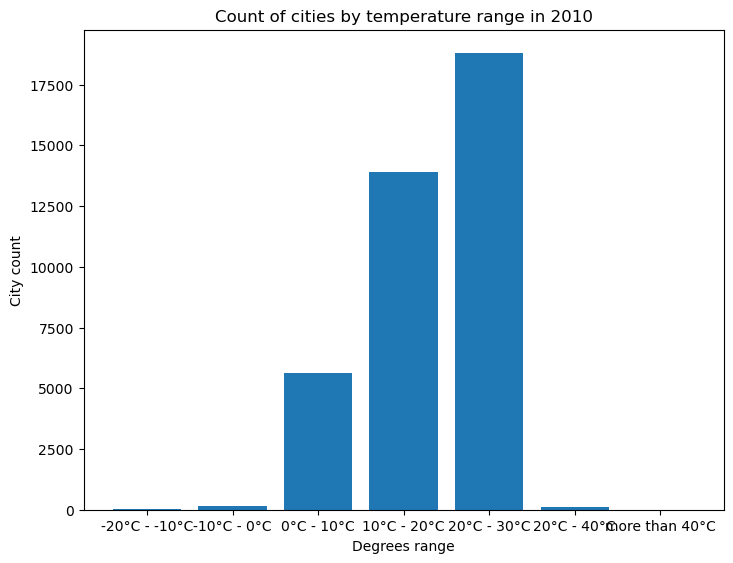

In [15]:
bins = [-20, -10, 0, 10, 20, 30, 40, float('inf')]
labels=['-20°C - -10°C','-10°C - 0°C','0°C - 10°C', '10°C - 20°C', '20°C - 30°C','20°C - 40°C','more than 40°C']

recent_df = df_per_city[df_per_city["date"] > "2010-1-1"][df_per_city["date"] < "2011-1-1"]
recent_df["mean_avgtemp"] = recent_df.groupby("City")["AverageTemperature"].transform('mean')

df=recent_df.groupby(pd.cut(recent_df['mean_avgtemp'], bins=bins, labels=labels)).size().reset_index(name='count')
print (df)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['mean_avgtemp'],df['count'])
plt.title('Count of cities by temperature range in 2010')
ax.set_xlabel('Degrees range')
ax.set_ylabel('City count')
plt.show()